In [50]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy
import os
import pandas 
import seaborn as sb
#
pandas.set_option("display.max_rows", 999)

# to make this notebook's output stable across runs
numpy.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [51]:
PATH ="/Users/clement.guiraud/Desktop/Data analysis/Data analysis track/MCA"
os.chdir(PATH)
cwd=os.getcwd()
print('current path directory is:', cwd)

current path directory is: /Users/clement.guiraud/Desktop/Data analysis/Data analysis track/MCA


In [52]:
# load data - index_col = 0 means n°0 is the label
D = pandas.read_excel("dog_data.xlsx",sheet_name="Feuil2",index_col=0)

# print summary
print(D.info())

# select and print active variables
DActives = D[['taille','poids','velocite','intellig','affect','agress']]
print(DActives)

# define p = number of variables
p = DActives.shape[1]

# define n = number of observations
n = DActives.shape[0]

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, beauceron to teckel
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   taille    26 non-null     object
 1   poids     26 non-null     object
 2   velocite  26 non-null     object
 3   intellig  26 non-null     object
 4   affect    26 non-null     object
 5   agress    26 non-null     object
 6   fonction  26 non-null     object
dtypes: object(7)
memory usage: 1.6+ KB
None
                   taille        poids       velocite        intellig  \
race                                                                    
beauceron   grande_taille  poids_moyen   grande_veloc  intell_moyenne   
basset      petite_taille  poids_leger   faible_veloc   faible_intell   
ber_allem   grande_taille  poids_moyen   grande_veloc   grande_intell   
boxer      moyenne_taille  poids_moyen  veloc_moyenne  intell_moyenne   
bull-dog    petite_taille  poids_leger   faible_veloc  intell_moye

In [53]:
# dummy coding (one hot encoding)
X = pandas.get_dummies(DActives,prefix='',prefix_sep='')
print(X)

# define M = total number of modalities
M = X.shape[1]

           grande_taille  moyenne_taille  petite_taille  grand_poids  \
race                                                                   
beauceron              1               0              0            0   
basset                 0               0              1            0   
ber_allem              1               0              0            0   
boxer                  0               1              0            0   
bull-dog               0               0              1            0   
bull-mass              1               0              0            1   
caniche                0               0              1            0   
chihuahua              0               0              1            0   
cocker                 0               1              0            0   
colley                 1               0              0            0   
dalmatien              0               1              0            0   
dobermann              1               0              0         

In [54]:
# import MCA module of fanalysis package
from fanalysis.mca import MCA

# instantiate a MCA object and fit it on the data
acm = MCA(row_labels=DActives.index,var_labels=DActives.columns)
acm.fit(DActives.values)

MCA(row_labels=Index(['beauceron', 'basset', 'ber_allem', 'boxer', 'bull-dog', 'bull-mass',
       'caniche', 'chihuahua', 'cocker', 'colley', 'dalmatien', 'dobermann',
       'dogue_all', 'epagn_bre', 'epagn_fra', 'fox_hound', 'fox_terri',
       'grand_ble', 'labrador', 'levrier', 'mastiff', 'pekinois', 'pointer',
       'saint_ber', 'setter', 'teckel'],
      dtype='object', name='race '),
    var_labels=Index(['taille', 'poids', 'velocite', 'intellig', 'affect', 'agress'], dtype='object'))

In [55]:
# print methods and attributes
dir(acm)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_binarization',
 '_check_feature_names',
 '_check_n_features',
 '_compute_stats',
 '_compute_svd',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'c_',
 'col_contrib_',
 'col_coord_',
 'col_cos2_',
 'col_labels',
 'col_labels_',
 'col_labels_short_',
 'col_labels_short_temp_',
 'col_labels_temp_',
 'col_topandas',
 'eig_',
 'fit',
 'fit_transform',
 'get_params',
 'mapping',
 'mapping_col',
 'mapping_row',
 'model_',
 'n_',
 'n_categories_',
 'n_components',
 'n_components_',
 'n_vars_',
 'plot_col_contrib'

In [56]:
# display eigenvalues
display(pandas.DataFrame(numpy.transpose(acm.eig_),columns=['Eigenvalues','%','Cumul %']))

,Eigenvalues,%,Cumul %
0,0.476358,28.581456,28.581456
1,0.366915,22.014920,50.596375
2,0.229305,13.758305,64.354680
3,0.157262,9.435690,73.790370
4,0.131410,7.884602,81.674972
5,0.109513,6.570780,88.245752
6,0.083409,5.004560,93.250312
7,0.059157,3.549401,96.799713
8,0.039207,2.352403,99.152117
9,0.014131,0.847883,100.000000


In [57]:
# compute the maximum number of factors
Hmax = M-p

# display eigenvalues
display(pandas.DataFrame(numpy.transpose(acm.eig_),columns=['Eigenvalues','%','Cumul %'],index=range(1,Hmax+1)))

,Eigenvalues,%,Cumul %
1,0.476358,28.581456,28.581456
2,0.366915,22.014920,50.596375
3,0.229305,13.758305,64.354680
4,0.157262,9.435690,73.790370
5,0.131410,7.884602,81.674972
6,0.109513,6.570780,88.245752
7,0.083409,5.004560,93.250312
8,0.059157,3.549401,96.799713
9,0.039207,2.352403,99.152117
10,0.014131,0.847883,100.000000


In [58]:
# Burt inertia : sum squared of the eigenvalues
print(f"Burt inertia : {numpy.sum(acm.eig_[0]**2)}")

Burt inertia : 0.4803106016068981


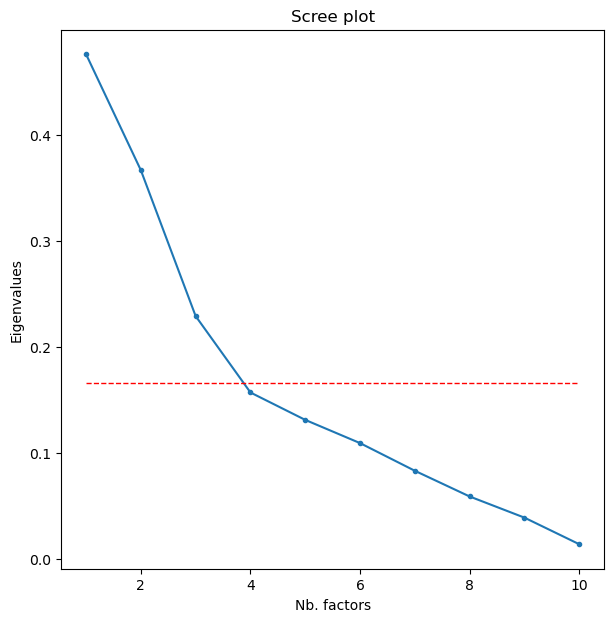

In [59]:
# plotting eigenvalues
import matplotlib.pyplot as plt

# scree plot
fix,ax = plt.subplots(figsize=(7,7))
ax.plot(range(1,Hmax+1),acm.eig_[0],".-")
ax.set_xlabel("Nb. factors")
ax.set_ylabel("Eigenvalues")
plt.title("Scree plot")

#seuil - Règle de Kaiser
ax.plot([1,Hmax],[1/p,1/p],"r--",linewidth=1)
plt.show()

In [60]:
# keep the eigenvalues greater than (1/p)
lambada = acm.eig_[0][acm.eig_[0]>1/p]
print(lambada)

[0.47635759 0.36691533 0.22930508]


In [61]:
# apply Benzécri correction
lambada_prim = ((p/(p-1))*(lambada-1/p))**2
print(lambada_prim)

[0.1381082  0.05774332 0.00564994]


In [62]:
# compute Benzécri corrected total cumulated variance
S_prim = numpy.sum(lambada_prim)
print(f"Benzécri corrected total variance : {S_prim}")

# percentage of explained variance
percent_prim = lambada_prim/S_prim*100

# print
pandas.DataFrame(numpy.transpose(numpy.array([lambada_prim,percent_prim,numpy.cumsum(percent_prim)])),
                 columns=['EigenValues','%','Cumul %'],index=range(0,3))

Benzécri corrected total variance : 0.20150145586871626


,EigenValues,%,Cumul %
0,0.138108,68.539553,68.539553
1,0.057743,28.656526,97.196079
2,0.005650,2.803921,100.000000


In [63]:
# compute Greenacre corrected cumulated variance
S2nd = p/(p-1)*(numpy.sum(acm.eig_[0]**2)-(M-p)/(p**2))
print(f"Greenacre corrected total variance : {S2nd}")

Greenacre corrected total variance : 0.24303938859494434


In [64]:
# Greenacre corrected percentage of explained variance
percent_2nd = lambada_prim/S2nd

# print
print(pandas.DataFrame(numpy.transpose(numpy.array([lambada_prim,percent_2nd,numpy.cumsum(percent_2nd)])),
                       columns=['Eigenvalues','%','Cumul %'],index=range(0,3)))

   Eigenvalues         %   Cumul %
0     0.138108  0.568254  0.568254
1     0.057743  0.237588  0.805843
2     0.005650  0.023247  0.829090


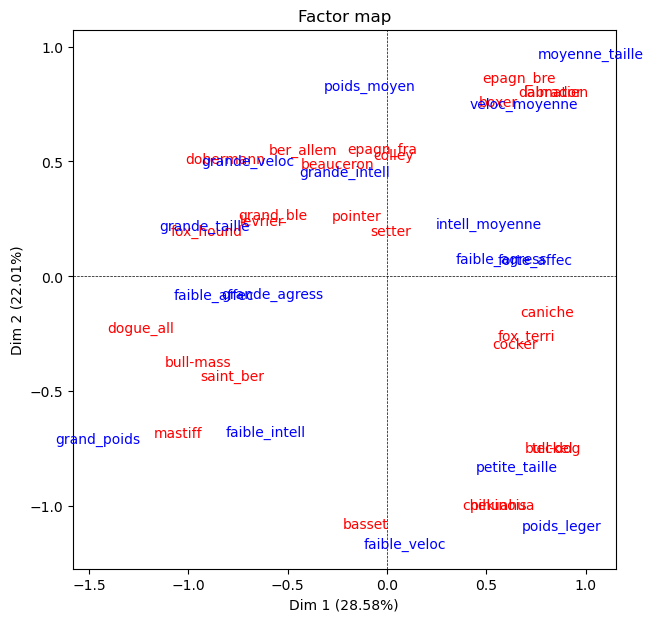

In [65]:
# plot in first factorial plane
acm.mapping(num_x_axis=1,num_y_axis=2, figsize=(7,7))

In [66]:
# print row coordinates in the first factor plane
print(pandas.DataFrame(acm.row_coord_[:,:2],index=X.index,columns=['Coord.F1','Coord.F2']))

           Coord.F1  Coord.F2
race                         
beauceron -0.247342  0.485495
basset    -0.106248 -1.077904
ber_allem -0.422429  0.548249
boxer      0.558468  0.758433
bull-dog   0.835373 -0.746943
bull-mass -0.952450 -0.373948
caniche    0.805082 -0.158148
chihuahua  0.563227 -0.995150
cocker     0.646047 -0.294338
colley     0.031850  0.527239
dalmatien  0.837660  0.800177
dobermann -0.812711  0.507238
dogue_all -1.240847 -0.226352
epagn_bre  0.662574  0.862930
epagn_fra -0.022300  0.553713
fox_hound -0.909771  0.196277
fox_terri  0.700976 -0.262645
grand_ble -0.573638  0.263763
labrador   0.837660  0.800177
levrier   -0.630578  0.238021
mastiff   -1.049510 -0.684908
pekinois   0.563227 -0.995150
pointer   -0.153708  0.260085
saint_ber -0.777364 -0.436701
setter     0.021378  0.197331
teckel     0.835373 -0.746943


In [67]:
# print modalities coordinates in the first factor plane
print(pandas.DataFrame(acm.col_coord_[:,:2],index=X.columns,columns=['Coord.F1','Coord.F2']))

                Coord.F1  Coord.F2
grande_taille  -0.918482  0.219855
moyenne_taille  1.026508  0.966554
petite_taille   0.654361 -0.830114
grand_poids    -1.456190 -0.710669
poids_leger     0.877128 -1.089011
poids_moyen    -0.085162  0.825340
faible_veloc    0.089778 -1.165156
grande_veloc   -0.702573  0.501426
veloc_moyenne   0.689394  0.746696
faible_intell  -0.612903 -0.677152
grande_intell  -0.210968  0.453005
intell_moyenne  0.514086  0.224933
faible_affec   -0.870265 -0.080258
forte_affec     0.745942  0.068793
faible_agress   0.578084  0.075857
grande_agress  -0.578084 -0.075857


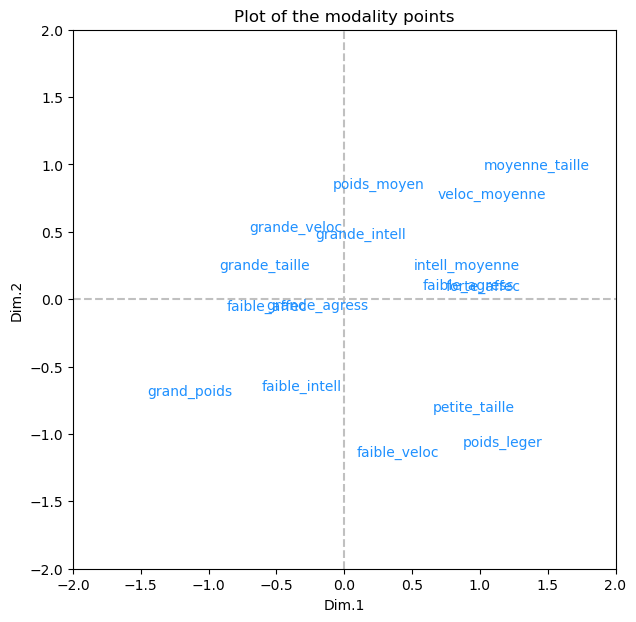

In [68]:
# plot the observations in the first factorial plane
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Plot of the modality points")

for i in range(X.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,1],X.columns[i],color='dodgerblue')
          
plt.show()

In [69]:
# display contributions
print(pandas.DataFrame(acm.col_contrib_[:,:2],index=X.columns,columns=['Contrib.F1','Contrib.F2']))

                Contrib.F1  Contrib.F2
grande_taille    13.622763    1.013359
moyenne_taille    7.089844    8.160783
petite_taille     5.185848   10.834975
grand_poids      11.414018    3.529425
poids_leger       8.282445   16.575405
poids_moyen       0.136634   16.661099
faible_veloc      0.097618   21.346170
grande_veloc      5.978161    3.953356
veloc_moyenne     5.116430    7.792681
faible_intell     4.044039    6.408737
grande_intell     0.359356    2.151128
intell_moyenne    4.267704    1.060708
faible_affec     12.230017    0.135043
forte_affec      10.482872    0.115751
faible_agress     5.846126    0.130691
grande_agress     5.846126    0.130691


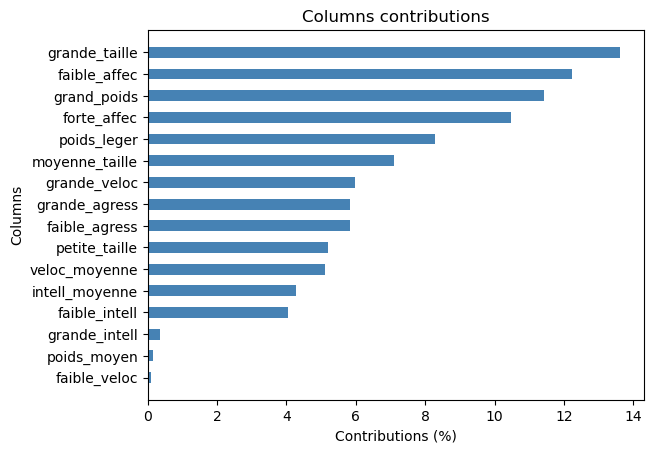

In [70]:
# or plot them
acm.plot_col_contrib(num_axis=1)

In [71]:
# display cos²
print(pandas.DataFrame(acm.col_cos2_[:,:2],index=X.columns,columns=['Cos2.F1','Cos2.F2']))

                 Cos2.F1   Cos2.F2
grande_taille   0.723094  0.041431
moyenne_taille  0.250885  0.222435
petite_taille   0.226688  0.364812
grand_poids     0.385544  0.091827
poids_leger     0.341935  0.527087
poids_moyen     0.008461  0.794718
faible_veloc    0.004267  0.718723
grande_veloc    0.261322  0.133109
veloc_moyenne   0.211228  0.247802
faible_intell   0.166955  0.203794
grande_intell   0.013352  0.061564
intell_moyenne  0.226529  0.043367
faible_affec    0.649167  0.005521
forte_affec     0.649167  0.005521
faible_agress   0.334182  0.005754
grande_agress   0.334182  0.005754


In [72]:
# print cumulated cos²
print(pandas.DataFrame(numpy.cumsum(acm.col_cos2_[:,:2],axis=1),index=X.columns,columns=['Cos2.F1','Cum(Cos2).F2']))

                 Cos2.F1  Cum(Cos2).F2
grande_taille   0.723094      0.764525
moyenne_taille  0.250885      0.473320
petite_taille   0.226688      0.591500
grand_poids     0.385544      0.477371
poids_leger     0.341935      0.869022
poids_moyen     0.008461      0.803179
faible_veloc    0.004267      0.722990
grande_veloc    0.261322      0.394431
veloc_moyenne   0.211228      0.459030
faible_intell   0.166955      0.370749
grande_intell   0.013352      0.074916
intell_moyenne  0.226529      0.269896
faible_affec    0.649167      0.654689
forte_affec     0.649167      0.654689
faible_agress   0.334182      0.339936
grande_agress   0.334182      0.339936


In [73]:
dir(acm)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_binarization',
 '_check_feature_names',
 '_check_n_features',
 '_compute_stats',
 '_compute_svd',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'c_',
 'col_contrib_',
 'col_coord_',
 'col_cos2_',
 'col_labels',
 'col_labels_',
 'col_labels_short_',
 'col_labels_short_temp_',
 'col_labels_temp_',
 'col_topandas',
 'eig_',
 'fit',
 'fit_transform',
 'get_params',
 'mapping',
 'mapping_col',
 'mapping_row',
 'model_',
 'n_',
 'n_categories_',
 'n_components',
 'n_components_',
 'n_vars_',
 'plot_col_contrib'

In [74]:
# counts (frequency) per modality (n_k)
print(acm.c_)

[[12.  5.  9.  4.  8. 14.  9.  9.  8.  8.  6. 12. 12. 14. 13. 13.]]


In [75]:
# compute test values per modality - Factor 1
vtest = acm.col_coord_[:,0]*numpy.sqrt(((n-1)*acm.c_[0])/(n-acm.c_[0]))
print(pandas.DataFrame(vtest,index=X.columns, columns=['Test Values F1']))

                Test Values F1
grande_taille        -4.251747
moyenne_taille        2.504422
petite_taille         2.380588
grand_poids          -3.104608
poids_leger           2.923761
poids_moyen          -0.459926
faible_veloc          0.326617
grande_veloc         -2.555984
veloc_moyenne         2.297979
faible_intell        -2.043009
grande_intell        -0.577758
intell_moyenne        2.379754
faible_affec         -4.028546
forte_affec           4.028546
faible_agress         2.890422
grande_agress        -2.890422


## Looking for value < 0.05

In [76]:
# save contributions under 2 facteurs (do not rename columns !!!)
contrib12 = pandas.DataFrame(acm.col_contrib_[:,:2],index=X.columns)
print(contrib12)

                        0          1
grande_taille   13.622763   1.013359
moyenne_taille   7.089844   8.160783
petite_taille    5.185848  10.834975
grand_poids     11.414018   3.529425
poids_leger      8.282445  16.575405
poids_moyen      0.136634  16.661099
faible_veloc     0.097618  21.346170
grande_veloc     5.978161   3.953356
veloc_moyenne    5.116430   7.792681
faible_intell    4.044039   6.408737
grande_intell    0.359356   2.151128
intell_moyenne   4.267704   1.060708
faible_affec    12.230017   0.135043
forte_affec     10.482872   0.115751
faible_agress    5.846126   0.130691
grande_agress    5.846126   0.130691


In [77]:
# compute squared correlation per variable on the two factors #

# initialize eta² matrix
eta2 = numpy.zeros((3,2))

# for each factor
for h in range(2):
    # for each variable
    for j in range(3):
        eta2[j,h] = (p*acm.eig_[0][h]*numpy.sum(contrib12.loc[numpy.unique(D.iloc[:,j])][h]))/100

#affichage
print(pandas.DataFrame(eta2,index=D.columns[:3],columns=['eta² F1','eta² F2']))

           eta² F1   eta² F2
taille    0.740216  0.440499
poids     0.566859  0.809399
velocite  0.319890  0.728522


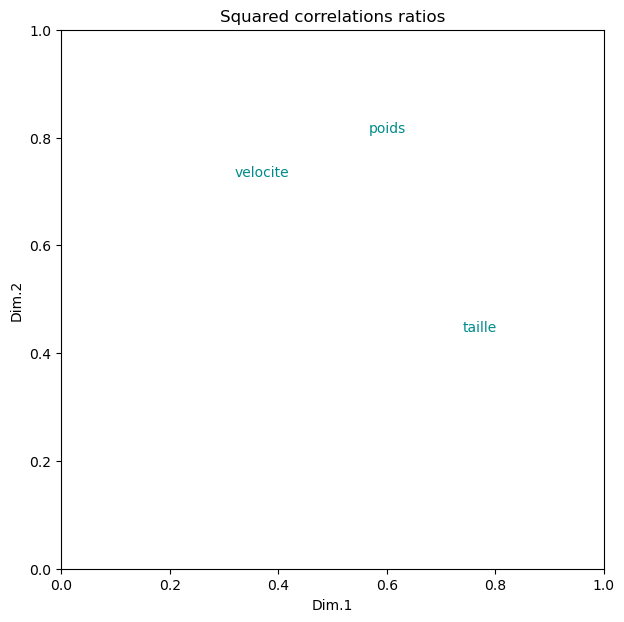

In [78]:
# plotting the variables in the first plane
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([0,+1,0,+1])
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Squared correlations ratios")

for i in range(3):
    ax.text(eta2[i,0],eta2[i,1],D.columns[i],color='darkcyan')
          
plt.show()


In [79]:
# coordinates of the individuals in the first plane
print(pandas.DataFrame(acm.row_coord_[:,:2],index=X.index,columns=['Coord.F1','Coord.F2']))

           Coord.F1  Coord.F2
race                         
beauceron -0.247342  0.485495
basset    -0.106248 -1.077904
ber_allem -0.422429  0.548249
boxer      0.558468  0.758433
bull-dog   0.835373 -0.746943
bull-mass -0.952450 -0.373948
caniche    0.805082 -0.158148
chihuahua  0.563227 -0.995150
cocker     0.646047 -0.294338
colley     0.031850  0.527239
dalmatien  0.837660  0.800177
dobermann -0.812711  0.507238
dogue_all -1.240847 -0.226352
epagn_bre  0.662574  0.862930
epagn_fra -0.022300  0.553713
fox_hound -0.909771  0.196277
fox_terri  0.700976 -0.262645
grand_ble -0.573638  0.263763
labrador   0.837660  0.800177
levrier   -0.630578  0.238021
mastiff   -1.049510 -0.684908
pekinois   0.563227 -0.995150
pointer   -0.153708  0.260085
saint_ber -0.777364 -0.436701
setter     0.021378  0.197331
teckel     0.835373 -0.746943


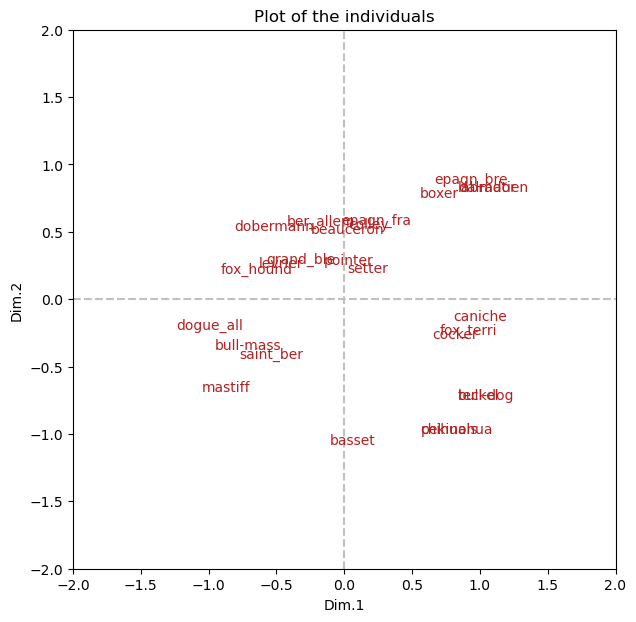

In [80]:
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Plot of the individuals")

for i in range(X.shape[0]):
    ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],X.index[i],color='firebrick')
          
plt.show()

In [81]:
# display the contributions
print(pandas.DataFrame(acm.row_contrib_[:,:2],index=X.index,columns=['Contrib.F1','Contrib.F2']))

           Contrib.F1  Contrib.F2
race                             
beauceron    0.493958    2.470761
basset       0.091145   12.179272
ber_allem    1.440788    3.150765
boxer        2.518199    6.029696
bull-dog     5.634487    5.848381
bull-mass    7.324507    1.465827
caniche      5.233281    0.262173
chihuahua    2.561302   10.380959
cocker       3.369935    0.908139
colley       0.008191    2.913908
dalmatien    5.665384    6.711705
dobermann    5.332932    2.697017
dogue_all   12.431695    0.537067
epagn_bre    3.544560    7.805709
epagn_fra    0.004015    3.213887
fox_hound    6.682785    0.403833
fox_terri    3.967346    0.723103
grand_ble    2.656863    0.729270
labrador     5.665384    6.711705
levrier      3.210493    0.593871
mastiff      8.893378    4.917282
pekinois     2.561302   10.380959
pointer      0.190759    0.709073
saint_ber    4.879134    1.999078
setter       0.003690    0.408181
teckel       5.634487    5.848381


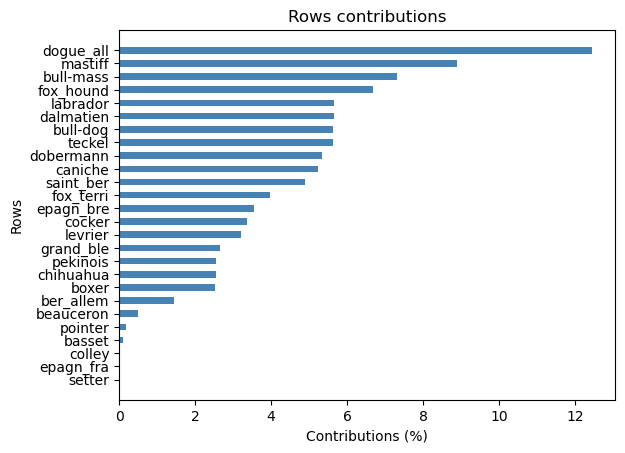

In [82]:
# or even plot them
acm.plot_row_contrib(num_axis=1)

In [83]:
# print the cos²
print(pandas.DataFrame(acm.row_cos2_[:,:2],index=X.index,columns=['Cos2.F1','Cos2.F2']))

            Cos2.F1   Cos2.F2
race                         
beauceron  0.052918  0.203883
basset     0.006485  0.667462
ber_allem  0.117616  0.198113
boxer      0.181137  0.334076
bull-dog   0.462581  0.369829
bull-mass  0.387247  0.059693
caniche    0.335851  0.012960
chihuahua  0.187801  0.586283
cocker     0.220393  0.045747
colley     0.000877  0.240450
dalmatien  0.407518  0.371863
dobermann  0.421027  0.164006
dogue_all  0.712154  0.023698
epagn_bre  0.210762  0.357500
epagn_fra  0.000392  0.241824
fox_hound  0.596216  0.027751
fox_terri  0.313216  0.043972
grand_ble  0.227187  0.048032
labrador   0.407518  0.371863
levrier    0.286429  0.040810
mastiff    0.509460  0.216971
pekinois   0.187801  0.586283
pointer    0.013987  0.040046
saint_ber  0.304971  0.096245
setter     0.000344  0.029321
teckel     0.462581  0.369829


In [84]:
# print the cumulated cos²
print(pandas.DataFrame(numpy.cumsum(acm.row_cos2_[:,:2],axis=1),index=X.index,columns=['Cos2.F1','Cum(Cos2).F2']))

            Cos2.F1  Cum(Cos2).F2
race                             
beauceron  0.052918      0.256801
basset     0.006485      0.673947
ber_allem  0.117616      0.315729
boxer      0.181137      0.515213
bull-dog   0.462581      0.832410
bull-mass  0.387247      0.446940
caniche    0.335851      0.348811
chihuahua  0.187801      0.774084
cocker     0.220393      0.266140
colley     0.000877      0.241328
dalmatien  0.407518      0.779381
dobermann  0.421027      0.585033
dogue_all  0.712154      0.735851
epagn_bre  0.210762      0.568262
epagn_fra  0.000392      0.242216
fox_hound  0.596216      0.623967
fox_terri  0.313216      0.357188
grand_ble  0.227187      0.275219
labrador   0.407518      0.779381
levrier    0.286429      0.327240
mastiff    0.509460      0.726431
pekinois   0.187801      0.774084
pointer    0.013987      0.054033
saint_ber  0.304971      0.401217
setter     0.000344      0.029665
teckel     0.462581      0.832410


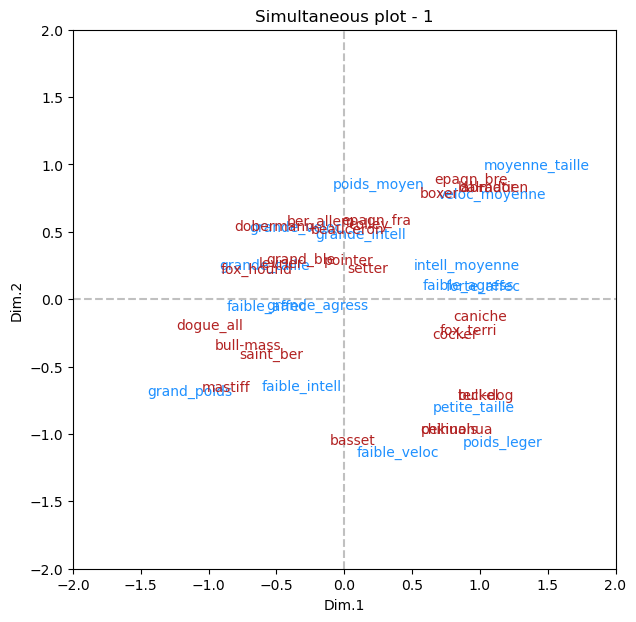

In [85]:
# simultaneous representation - relation quasi-barycentrique
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Simultaneous plot - 1")

for i in range(X.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,1],X.columns[i],color='dodgerblue')
    
for i in range(X.shape[0]):
    ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],X.index[i],color='firebrick')
          
plt.show()

In [86]:
# load supplementary individual
DSupp = pandas.read_excel("dog_data.xlsx",sheet_name="Feuil3",index_col=0)
print(DSupp)

                  taille        poids      velocite       intellig  \
race                                                                 
terre_neu  grande_taille  grand_poids  faible_veloc  grande_intell   

                 affect         agress fonction  
race                                             
terre_neu  faible_affec  faible_agress     util  


In [87]:
# remind modality coordinates
print(pandas.DataFrame(acm.col_coord_[:,:2],index=X.columns))

                       0         1
grande_taille  -0.918482  0.219855
moyenne_taille  1.026508  0.966554
petite_taille   0.654361 -0.830114
grand_poids    -1.456190 -0.710669
poids_leger     0.877128 -1.089011
poids_moyen    -0.085162  0.825340
faible_veloc    0.089778 -1.165156
grande_veloc   -0.702573  0.501426
veloc_moyenne   0.689394  0.746696
faible_intell  -0.612903 -0.677152
grande_intell  -0.210968  0.453005
intell_moyenne  0.514086  0.224933
faible_affec   -0.870265 -0.080258
forte_affec     0.745942  0.068793
faible_agress   0.578084  0.075857
grande_agress  -0.578084 -0.075857


In [88]:
# remind eigenvalues
print(acm.eig_[0][:2])

[0.47635759 0.36691533]


In [89]:
# preprocess supplementary individual

# initialize vector
XSupp = numpy.zeros(M)

# dummy coding
for v in DSupp.loc['terre_neu'].values:
    XSupp[numpy.where(X.columns==v)] = 1

# compute profile
XSupp = XSupp / p
print(XSupp)

[0.16666667 0.         0.         0.16666667 0.         0.
 0.16666667 0.         0.         0.         0.16666667 0.
 0.16666667 0.         0.16666667 0.        ]


In [90]:
# projection on the factor coordinates
coord_supp = numpy.dot(numpy.reshape(XSupp,(1,M)),acm.col_coord_[:,:2])
coord_supp = coord_supp / numpy.sqrt(acm.eig_[0][:2])
print(coord_supp)

[[-0.67325818 -0.33220398]]


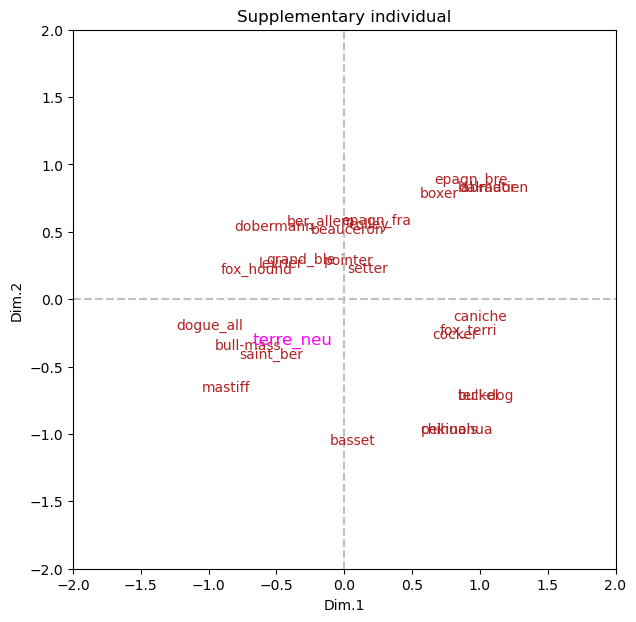

In [91]:
# represent in first factor plane
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Supplementary individual")

# active individuals
for i in range(X.shape[0]):
    ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],X.index[i],color='firebrick')

# supplementary individual
ax.text(coord_supp[0][0],coord_supp[0][1],'terre_neu',color='magenta',fontsize=12)
          
plt.show()

In [93]:
# supplementary variables
print(D[['fonction']])

           fonction
race               
beauceron      util
basset       chasse
ber_allem      util
boxer      companie
bull-dog   companie
bull-mass      util
caniche    companie
chihuahua  companie
cocker     companie
colley     companie
dalmatien  companie
dobermann      util
dogue_all      util
epagn_bre    chasse
epagn_fra    chasse
fox_hound    chasse
fox_terri  companie
grand_ble    chasse
labrador     chasse
levrier      chasse
mastiff        util
pekinois   companie
pointer      chasse
saint_ber      util
setter       chasse
teckel     companie


In [94]:
# temporary structure including factors 1 and 2, and variable fonction
df = pandas.DataFrame(acm.row_coord_[:,:2],index=X.index,columns=['F1','F2'])
df['fonction'] = D.fonction
print(df)

                 F1        F2  fonction
race                                   
beauceron -0.247342  0.485495      util
basset    -0.106248 -1.077904    chasse
ber_allem -0.422429  0.548249      util
boxer      0.558468  0.758433  companie
bull-dog   0.835373 -0.746943  companie
bull-mass -0.952450 -0.373948      util
caniche    0.805082 -0.158148  companie
chihuahua  0.563227 -0.995150  companie
cocker     0.646047 -0.294338  companie
colley     0.031850  0.527239  companie
dalmatien  0.837660  0.800177  companie
dobermann -0.812711  0.507238      util
dogue_all -1.240847 -0.226352      util
epagn_bre  0.662574  0.862930    chasse
epagn_fra -0.022300  0.553713    chasse
fox_hound -0.909771  0.196277    chasse
fox_terri  0.700976 -0.262645  companie
grand_ble -0.573638  0.263763    chasse
labrador   0.837660  0.800177    chasse
levrier   -0.630578  0.238021    chasse
mastiff   -1.049510 -0.684908      util
pekinois   0.563227 -0.995150  companie
pointer   -0.153708  0.260085    chasse


In [95]:
# compute conditional means
GBar = pandas.pivot_table(df,values=['F1','F2'],index="fonction",aggfunc='mean')
print(GBar)

                F1        F2
fonction                    
chasse   -0.097181  0.254933
companie  0.637728 -0.211347
util     -0.786093 -0.025847


In [46]:
# factor coordinates of the modalities - Solution 1
Gv1 = GBar.values/numpy.sqrt(acm.eig_[0][:2])
Gv1 = pandas.DataFrame(Gv1,index=GBar.index,columns=GBar.columns)
print(Gv1)

                F1        F2
fonction                    
chasse   -0.140804  0.420865
companie  0.923994 -0.348909
util     -1.138958 -0.042670


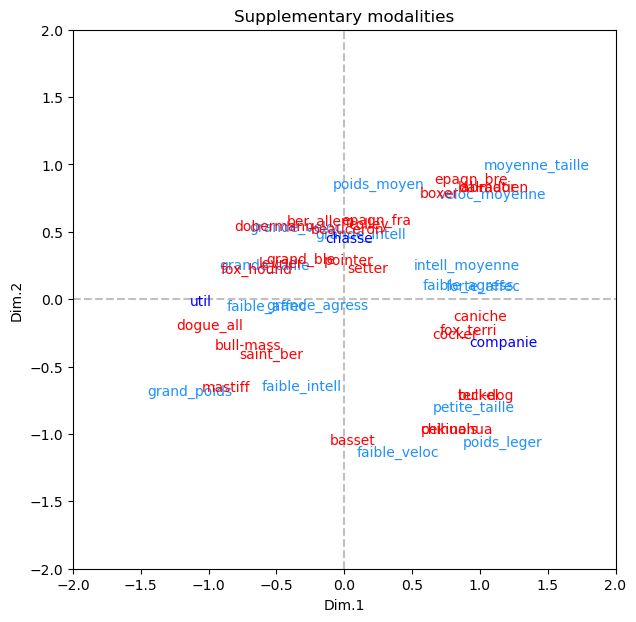

In [97]:
# plot of supplementary variables in the first factor plane
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Supplementary modalities")

# active modalities
for i in range(X.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,1],X.columns[i],color='dodgerblue')
    
# active modalities
for i in range(X.shape[0]):
    ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],X.index[i],color='red')
    
# modalities of the supplementary variable "fonction"
for i in Gv1.index:
    ax.text(Gv1.loc[i][0],Gv1.loc[i][1],i,color='blue')
          
plt.show()